# Assignment 2

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pylab as plt
import math
import seaborn as sbn
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
data = pd.read_csv("assignment2_part1.csv")
for col in data:
    print(col)
data.head()

Unnamed: 0
x
y


,Unnamed: 0,x,y
0,0,-15.0,-2156.994097
1,1,-14.5,-1956.523904
2,2,-14.0,-1778.151738
3,3,-13.5,-1610.924846
4,4,-13.0,-1456.176307


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.shape

(80, 2)

In [4]:
data.head()

,x,y
0,-15.0,-2156.994097
1,-14.5,-1956.523904
2,-14.0,-1778.151738
3,-13.5,-1610.924846
4,-13.0,-1456.176307


### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as testing and other 10% as validation)

In [5]:
training_data, testing_data, validation_data = np.split(data.sample(frac = 1), [int(len(data)*0.8), int(len(data)*0.9)]) #80,10, and remainder is 10
print('The size of the training set is: {}'.format(len(training_data)))
print('The size of the testing set is: {}'.format(len(testing_data)))
print('The size of the validation set is: {}'.format(len(validation_data)))

The size of the training set is: 64
The size of the testing set is: 8
The size of the validation set is: 8


### Task 3: Visualize the data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

### Data Visualization

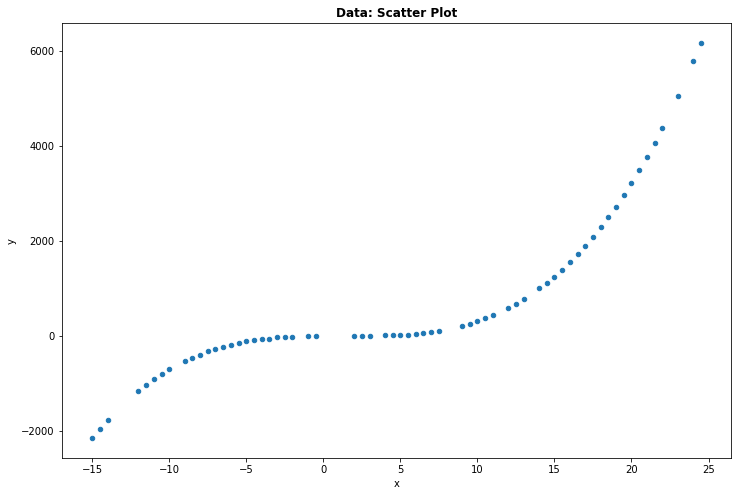

In [6]:
training_data.plot.scatter(x='x', y='y', figsize=(12,8))
plt.title('Data: Scatter Plot', weight='bold')
plt.show()

###  Data Fitting

In [7]:
lr=smf.ols(formula='y~x',data=training_data).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.36e-21
Time:                        02:21:42   Log-Likelihood:                -522.61
No. Observations:                  64   AIC:                             1049.
Df Residuals:                      62   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.2056    118.716      0.532      0.5

#### Comment: Based on the adjusted R-squared, we can assume that the model explains 76.6% of the variation in y

### Find Predicted y

In [8]:
training_data['ypred']=lr.predict()
training_data.head()

,x,y,ypred
55,12.5,672.332351,1724.397674
13,-8.5,-465.015577,-1066.405091
29,-0.5,0.566544,-3.242133
8,-11.0,-917.935911,-1398.643515
42,6.0,42.298979,860.577771


In [9]:
r2_score(training_data.y, training_data['ypred'])

0.7656489411974496

### Task 4: Visualize the regression fit

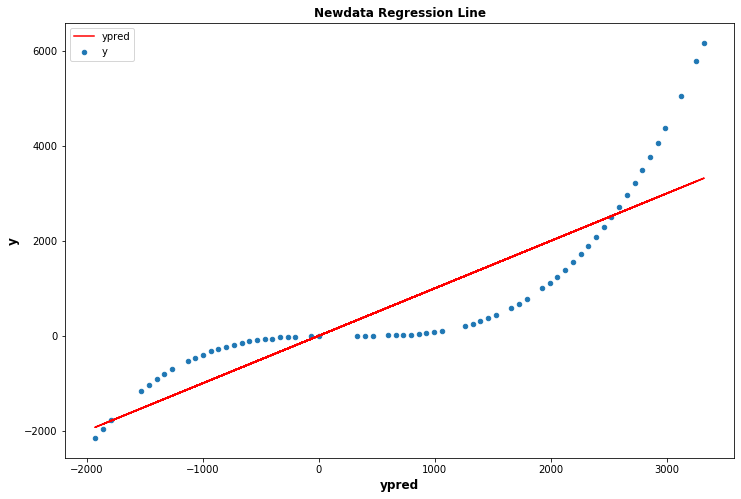

In [88]:
fig, ax = plt.subplots(figsize=(12,8))
training_data.plot(ax=ax,x='ypred',y='y',kind='scatter',)
ax.plot(training_data['ypred'],training_data['ypred'],'r-')
plt.title('Newdata Regression Line', weight='bold')

plt.xlabel('ypred', fontsize=12, weight='bold')
plt.ylabel('y',fontsize=12, weight='bold')
plt.legend(['ypred','y'])

plt.show()
plt.show()

### Task 5: Try to introduce another regressor variable if you think that linear model was not apt for this.

In [11]:
multidata=training_data.copy()
multidata['x2']=(multidata.x)**2

### Task 6: Fit a regression model to it,now with 2 regressor variables and also visualize the results

In [12]:
mr2=smf.ols(formula='y~x+x2', data=multidata).fit()
print(mr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     226.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           5.70e-29
Time:                        02:21:43   Log-Likelihood:                -500.81
No. Observations:                  64   AIC:                             1008.
Df Residuals:                      61   BIC:                             1014.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -515.7700    113.467     -4.546      0.0

In [13]:
multidata['Predicted y with x2']= mr2.predict()
multidata=multidata[['x','x2','y','Predicted y with x2']]
multidata.head()

,x,x2,y,Predicted y with x2
55,12.5,156.25,672.332351,1322.134780
13,-8.5,72.25,-465.015577,-827.166873
29,-0.5,0.25,0.566544,-555.115578
8,-11.0,121.00,-917.935911,-774.186075
42,6.0,36.00,42.298979,161.400422


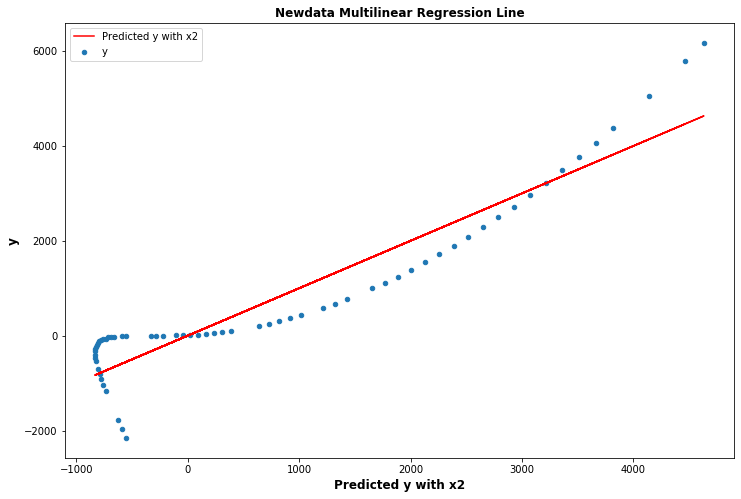

In [89]:
fig, ax=plt.subplots(figsize=(12,8))
multidata.plot(ax=ax, x='Predicted y with x2', y='y', kind='scatter')
ax.plot(multidata['Predicted y with x2'],multidata['Predicted y with x2'],'r-')
plt.title('Newdata Multilinear Regression Line', weight='bold')

plt.xlabel('Predicted y with x2', fontsize=12, weight='bold')
plt.ylabel('y',fontsize=12, weight='bold')
plt.legend(['Predicted y with x2','y'])

plt.show()

#### Comment: Linear regression does not fit well the data which might suggest that using a Polynomial regression could yield bette results

### Task 7: Generate regressors in the validation sample in range from M=12(Max power of x) and compute the model prediction.Visualize the fit of the model.

### Let's introduce 12 regressors in the training set and fit the model

In [15]:
M = 12
for p in range(1,M+1): 
    training_data['x%d'%p]=training_data.x**p
training_data.head()

,x,y,ypred,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
55,12.5,672.332351,1724.397674,12.5,156.25,1953.125,24414.0625,305175.78125,3.814697e+06,4.768372e+07,5.960464e+08,7.450581e+09,9.313226e+10,1.164153e+12,1.455192e+13
13,-8.5,-465.015577,-1066.405091,-8.5,72.25,-614.125,5220.0625,-44370.53125,3.771495e+05,-3.205771e+06,2.724905e+07,-2.316169e+08,1.968744e+09,-1.673432e+10,1.422418e+11
29,-0.5,0.566544,-3.242133,-0.5,0.25,-0.125,0.0625,-0.03125,1.562500e-02,-7.812500e-03,3.906250e-03,-1.953125e-03,9.765625e-04,-4.882812e-04,2.441406e-04
8,-11.0,-917.935911,-1398.643515,-11.0,121.00,-1331.000,14641.0000,-161051.00000,1.771561e+06,-1.948717e+07,2.143589e+08,-2.357948e+09,2.593742e+10,-2.853117e+11,3.138428e+12
42,6.0,42.298979,860.577771,6.0,36.00,216.000,1296.0000,7776.00000,4.665600e+04,2.799360e+05,1.679616e+06,1.007770e+07,6.046618e+07,3.627971e+08,2.176782e+09


In [16]:
R2 = []
Params = []

for M in range(1,M+1):
    lr = smf.ols(formula = 'y~'+'+'.join(['x%d'%p for p in range(1,M+1)]), data = training_data).fit()
    R2.append(lr.rsquared)
    Params.append(lr.params)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.301e+05
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          9.78e-114
Time:                        02:21:44   Log-Likelihood:                -249.54
No. Observations:                  64   AIC:                             519.1
Df Residuals:                      54   BIC:                             540.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   1.02e-05     11.861      0.0

<Figure size 432x288 with 0 Axes>

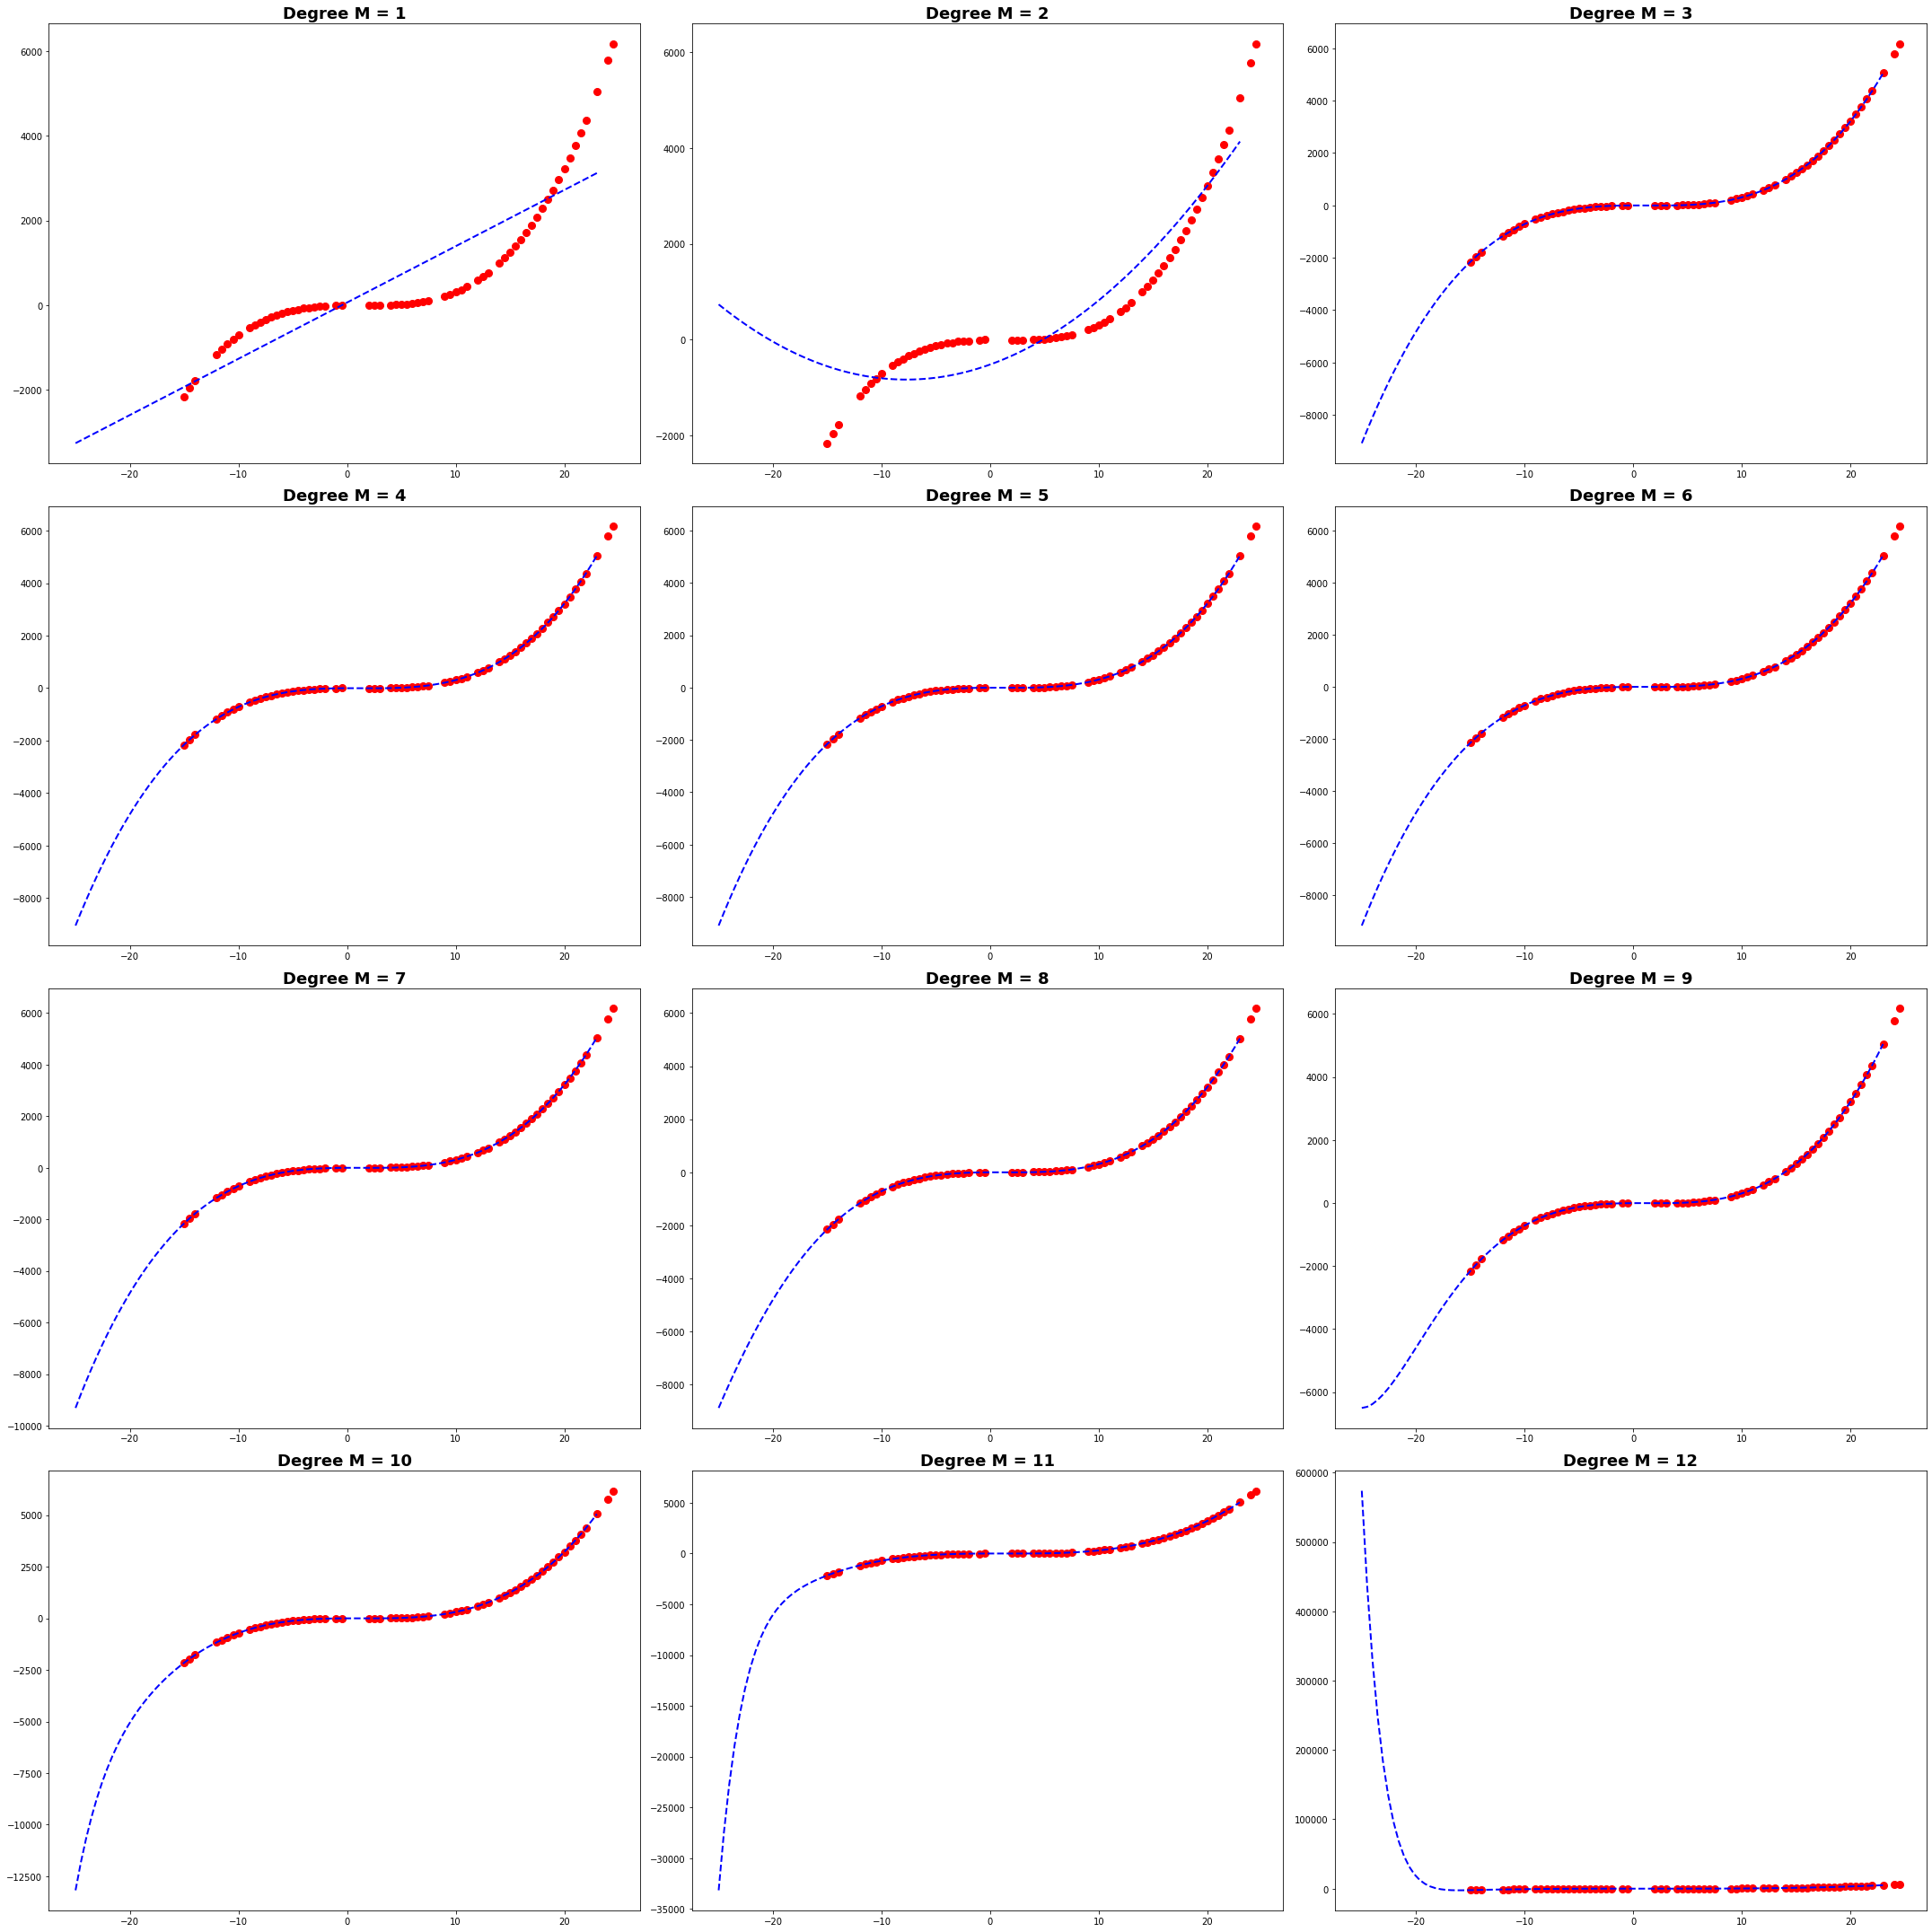

In [17]:
plt.clf()
plt.figure(figsize = (30,30))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-25,23,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(training_data.x1, training_data.y, 'ro', markersize = 8) 
    plt.plot(x_fit, y_fit, 'b--', lw = 2, markersize=8)     
    plt.title('Degree M = %d'%(M), fontsize = 18, weight='bold')

    plt.tight_layout()

### Now let's fit the validation data

In [18]:
validation_data

,x,y
11,-9.5,-620.731317
47,8.5,165.848407
77,23.5,5398.727545
32,1.0,-3.617848
33,1.5,-7.816780
30,0.0,-6.878571
57,13.5,877.324955
31,0.5,-2.136347


### Adding 12 regressors

In [19]:
for m in range(1,13):
    validation_data['x%d'%m]=validation_data.x**m

validation_data.head()
    

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
11,-9.5,-620.731317,-9.5,90.25,-857.375,8145.0625,-7.737809e+04,7.350919e+05,-6.983373e+06,6.634204e+07,-6.302494e+08,5.987369e+09,-5.688001e+10,5.403601e+11
47,8.5,165.848407,8.5,72.25,614.125,5220.0625,4.437053e+04,3.771495e+05,3.205771e+06,2.724905e+07,2.316169e+08,1.968744e+09,1.673432e+10,1.422418e+11
77,23.5,5398.727545,23.5,552.25,12977.875,304980.0625,7.167031e+06,1.684252e+08,3.957993e+09,9.301284e+10,2.185802e+12,5.136634e+13,1.207109e+15,2.836706e+16
32,1.0,-3.617848,1.0,1.00,1.000,1.0000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
33,1.5,-7.816780,1.5,2.25,3.375,5.0625,7.593750e+00,1.139062e+01,1.708594e+01,2.562891e+01,3.844336e+01,5.766504e+01,8.649756e+01,1.297463e+02


### Fitting the model

In [20]:
validation_data['ypred']=lr.predict(validation_data)
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.301e+05
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          9.78e-114
Time:                        02:21:51   Log-Likelihood:                -249.54
No. Observations:                  64   AIC:                             519.1
Df Residuals:                      54   BIC:                             540.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   1.02e-05     11.861      0.0

<Figure size 432x288 with 0 Axes>

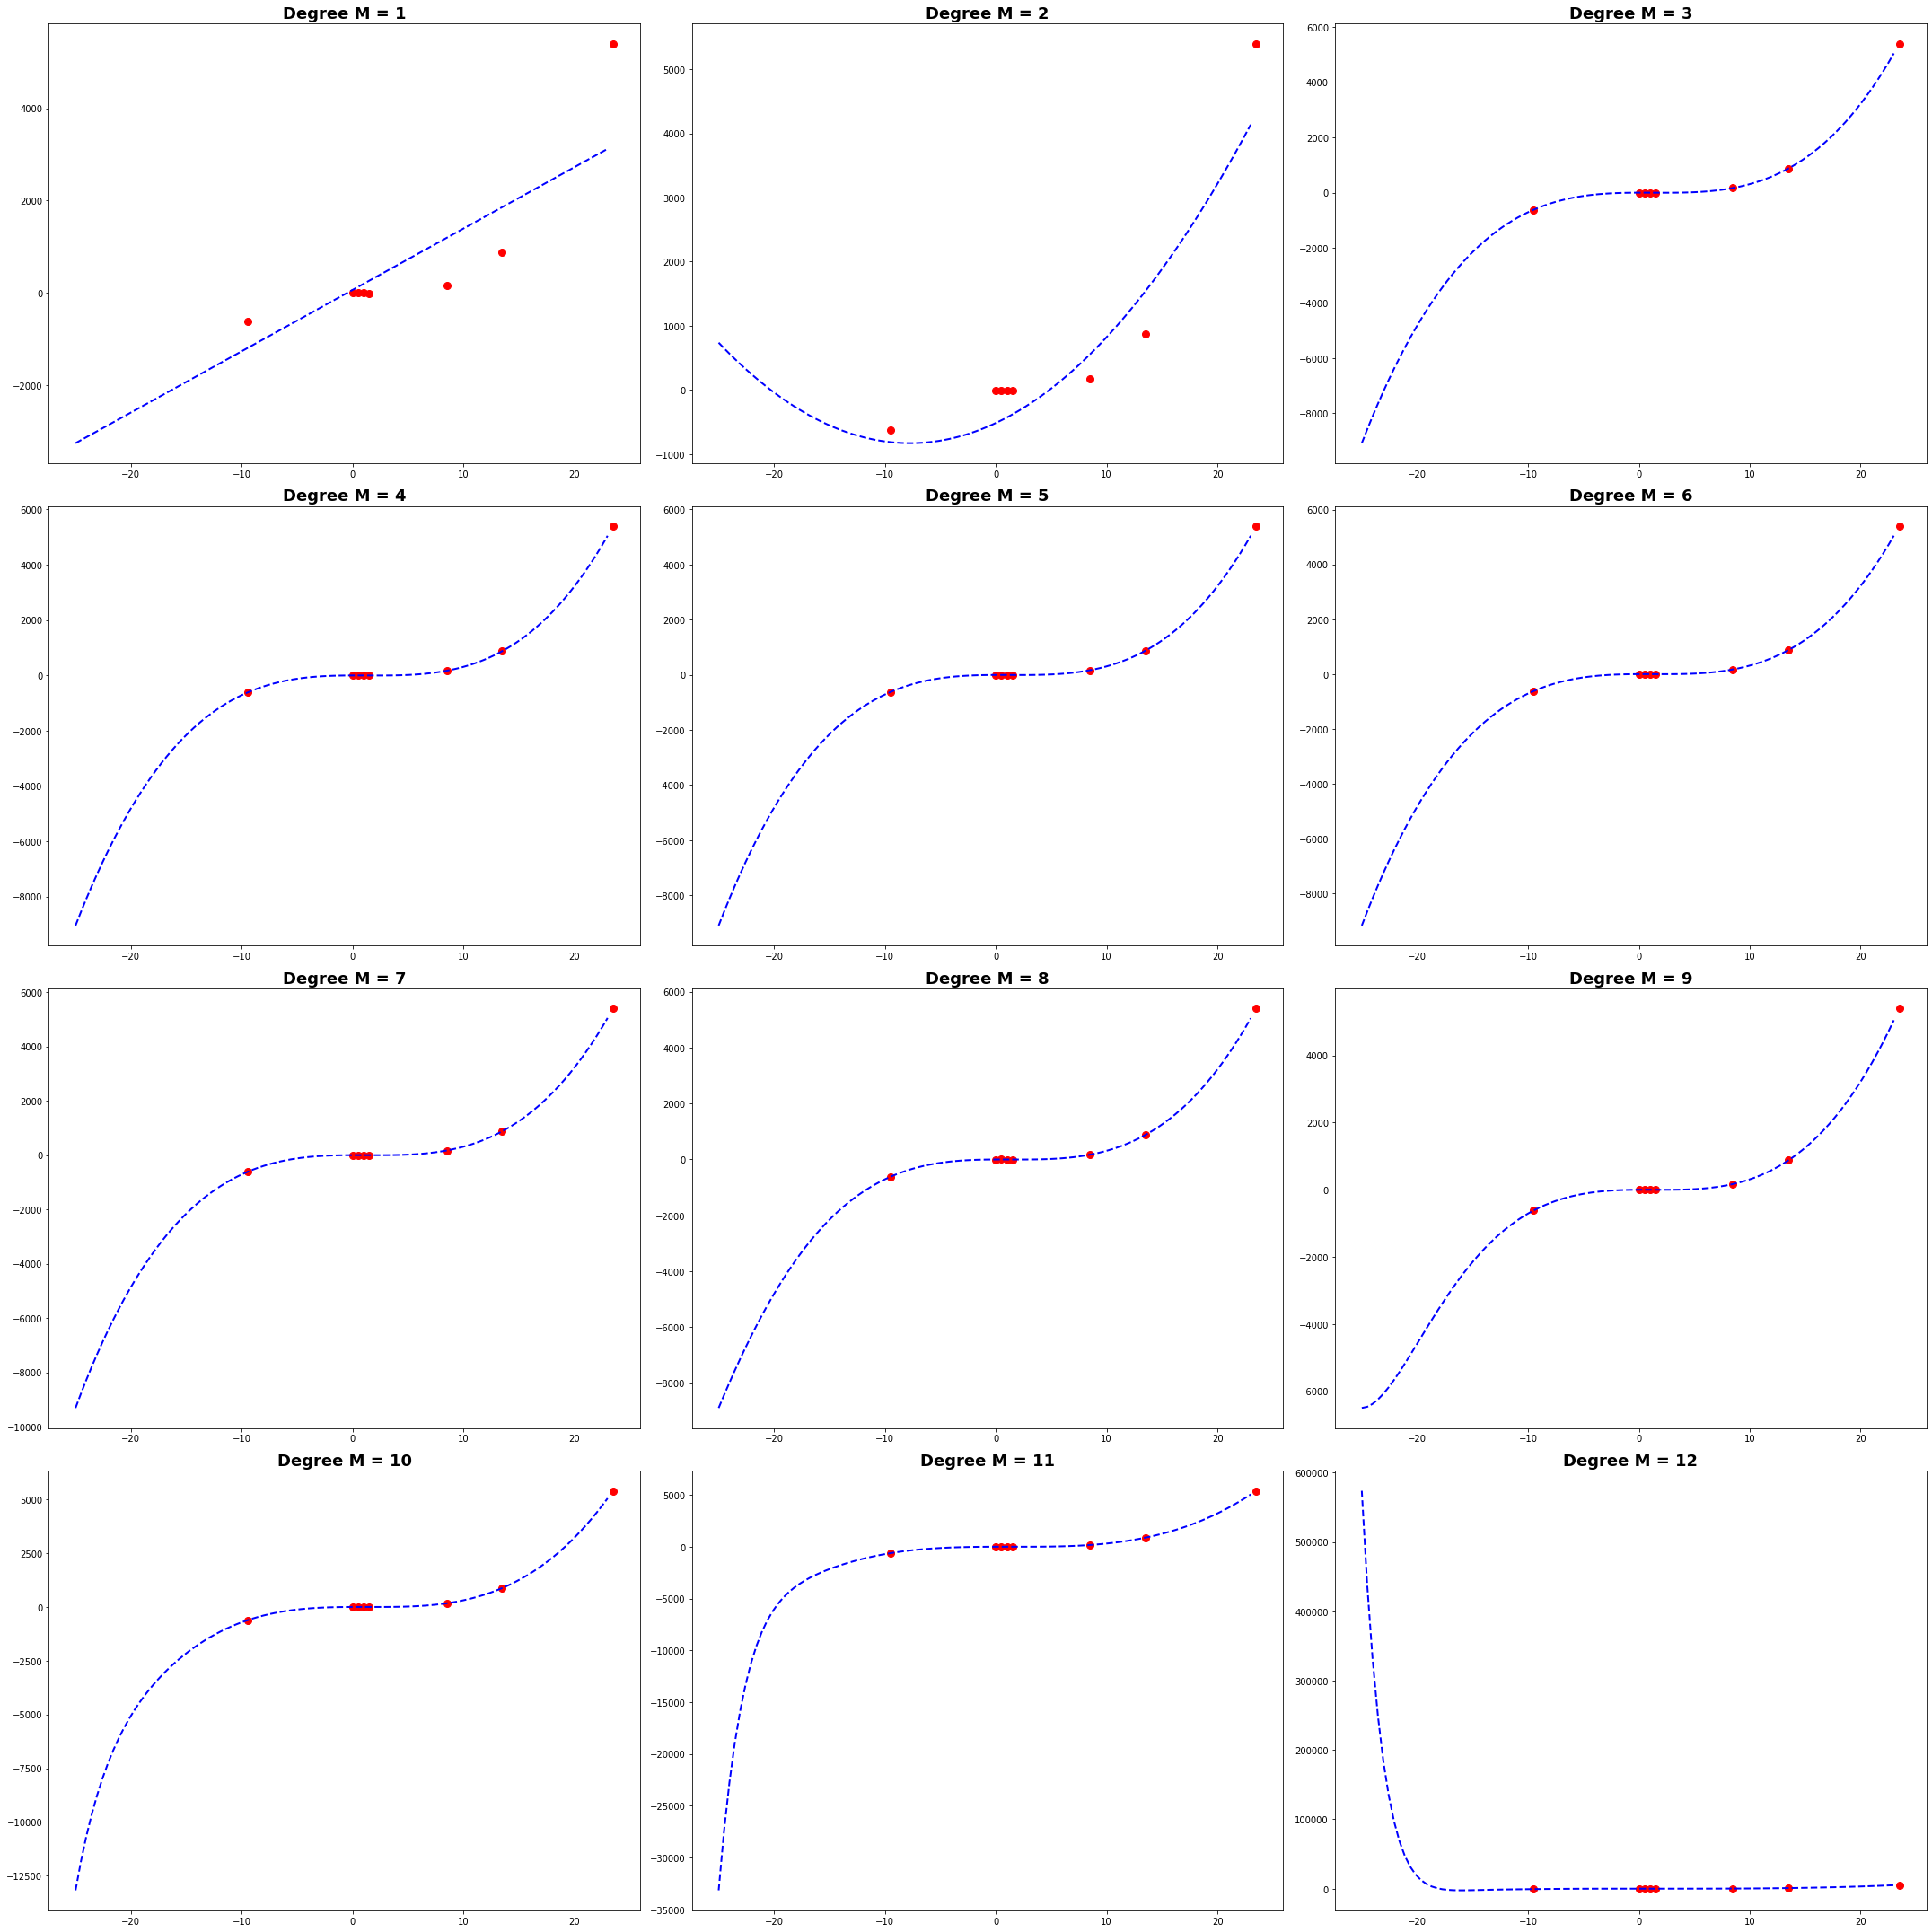

In [21]:
plt.clf()
plt.figure(figsize = (30,30))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-25,23,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(validation_data.x1, validation_data.y, 'ro', markersize = 8) 
    plt.plot(x_fit, y_fit, 'b--', lw = 2)     
    plt.title('Degree M = %d'%(M), fontsize = 18, weight='bold')

    plt.tight_layout()

<Figure size 432x288 with 0 Axes>

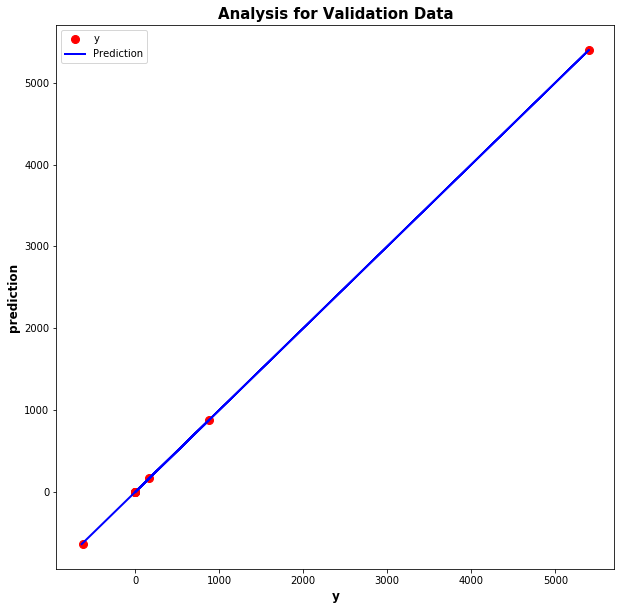

In [91]:
plt.clf()
plt.figure(figsize = (10,10))

plt.plot(validation_data.y, validation_data.ypred, 'ro', markersize = 8)
plt.plot(validation_data.ypred,  validation_data.ypred, 'b-', lw =2)
plt.title('Analysis for Validation Data', fontsize = 15, weight='bold')


plt.xlabel('y', weight='bold', fontsize=12)
plt.ylabel('prediction',weight='bold', fontsize=12)
plt.legend(['y','Prediction'])

plt.show()

### Task 8:Compute R2 over the validation data

In [23]:
r2_score(validation_data.y, validation_data.ypred)

0.9999842117910449

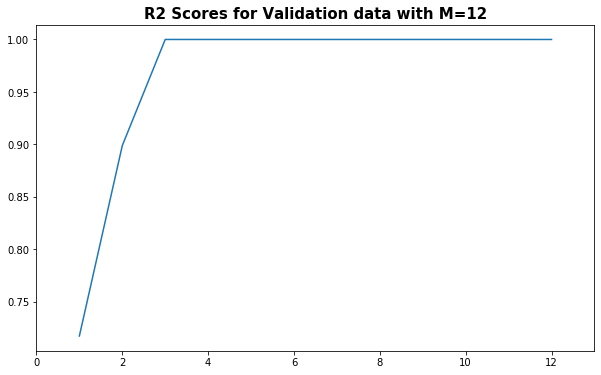

In [24]:
R2_validation = [[] for i in range(12)]
lr_validation = [[] for i in range(12)]

for m in range(1,13):
    lr_validation[m-1] = smf.ols(formula='y~x'+'+'*(m>1)+'+'.join(['x%d'%p for p in range(2,m+1)]), data = training_data).fit()
    validation_data['prediction']=lr_validation[m-1].predict(validation_data)
    R2_validation[m-1]=1-((validation_data.prediction-validation_data.y)**2).sum()/((validation_data.y-validation_data.y.mean())**2).sum()

plt.figure(figsize=(10,6))
plt.xlim(0,13)
    
plt.title("R2 Scores for Validation data with M=12", fontsize = 15, weight='bold')
plt.plot(range(1,13), R2_validation)

### Task 9: Did you get an optimal value with M=12?

## The model is overfit at M=12 in the sense that it is too closely adjusted to fit all the points of the dataset and may fail to accurately predict future patterns. Based on the R2 plot, we can infer that M=3 provides a better fit

### Task 10:Generate regressors in the test sample and compute the model prediction

In [25]:
testing_data

,x,y
75,22.5,4704.656094
27,-1.5,-10.531005
5,-12.5,-1302.029411
3,-13.5,-1610.924846
4,-13.0,-1456.176307
37,3.5,-0.091988
53,11.5,503.038243
46,8.0,132.927022


In [26]:
p = 12
for m in range(1,p+1): 
    testing_data['x%d'%m] = testing_data.x**m
testing_data.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
75,22.5,4704.656094,22.5,506.25,11390.625,256289.0625,5.766504e+06,1.297463e+08,2.919293e+09,6.568408e+10,1.477892e+12,3.325257e+13,7.481828e+14,1.683411e+16
27,-1.5,-10.531005,-1.5,2.25,-3.375,5.0625,-7.593750e+00,1.139062e+01,-1.708594e+01,2.562891e+01,-3.844336e+01,5.766504e+01,-8.649756e+01,1.297463e+02
5,-12.5,-1302.029411,-12.5,156.25,-1953.125,24414.0625,-3.051758e+05,3.814697e+06,-4.768372e+07,5.960464e+08,-7.450581e+09,9.313226e+10,-1.164153e+12,1.455192e+13
3,-13.5,-1610.924846,-13.5,182.25,-2460.375,33215.0625,-4.484033e+05,6.053445e+06,-8.172151e+07,1.103240e+09,-1.489375e+10,2.010656e+11,-2.714385e+12,3.664420e+13
4,-13.0,-1456.176307,-13.0,169.00,-2197.000,28561.0000,-3.712930e+05,4.826809e+06,-6.274852e+07,8.157307e+08,-1.060450e+10,1.378585e+11,-1.792160e+12,2.329809e+13


In [27]:
testing_data['ypred'] = lr.predict(testing_data)

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.301e+05
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          9.78e-114
Time:                        02:21:59   Log-Likelihood:                -249.54
No. Observations:                  64   AIC:                             519.1
Df Residuals:                      54   BIC:                             540.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001   1.02e-05     11.861      0.0

In [28]:
r2_score(testing_data.y,testing_data.ypred)

0.999963556461179

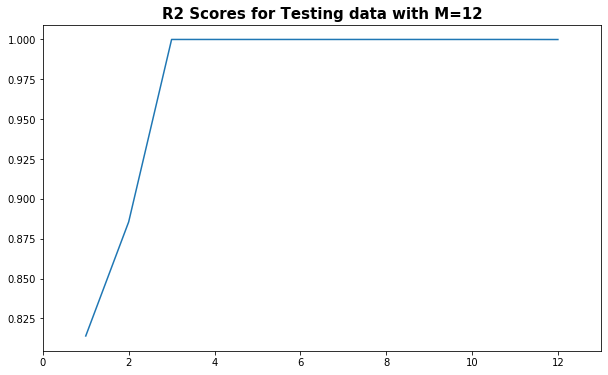

In [29]:
R2_testing = [[] for i in range(12)]
lr_testing = [[] for i in range(12)]

for m in range(1,13):
    lr_testing[m-1] = smf.ols(formula='y~x'+'+'*(m>1)+'+'.join(['x%d'%p for p in range(2,m+1)]), data = training_data).fit()
    testing_data['prediction']=lr_testing[m-1].predict(testing_data)
    R2_testing[m-1]=1-((testing_data.prediction-testing_data.y)**2).sum()/((testing_data.y-testing_data.y.mean())**2).sum()

plt.figure(figsize=(10,6))
plt.xlim(0,13)
    
plt.title("R2 Scores for Testing data with M=12", fontsize = 15, weight='bold')
plt.plot(range(1,13), R2_testing)

### Task 11:Visualize results of Task 10.


<Figure size 432x288 with 0 Axes>

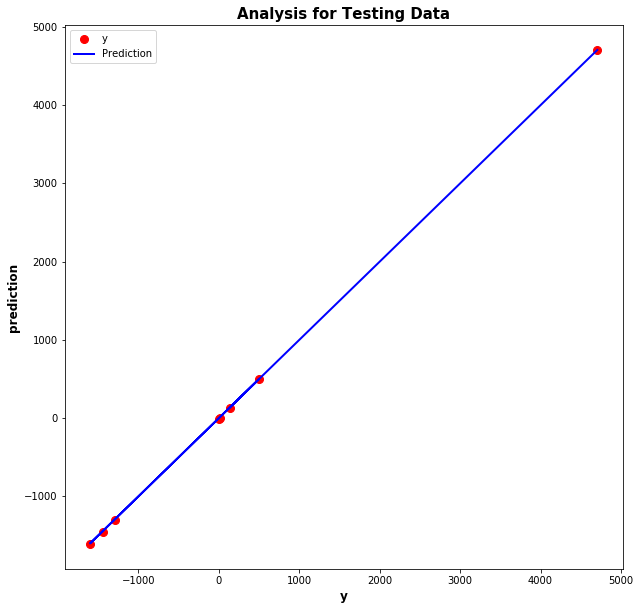

In [92]:
plt.clf()
plt.figure(figsize = (10,10))
plt.plot(testing_data.ypred, testing_data.y, 'ro', markersize = 8)
plt.plot(testing_data.ypred, testing_data.ypred, 'b-', lw =2)
plt.title('Analysis for Testing Data', fontsize = 15, weight='bold')

plt.xlabel('y', weight='bold', fontsize=12)
plt.ylabel('prediction',weight='bold', fontsize=12)
plt.legend(['y','Prediction'])

plt.show()


In [31]:
r2_score(testing_data.y,testing_data.ypred)

0.999963556461179

## Problem 2: Refer the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression on Advanced vs Other, "Advanced" which incorporated Master, Doctorate and ProfSchool and "Other" incorporating less than Bachelor.Your regression model will be between predicted and observed income.

In [32]:
education= pd.read_csv('data/IncomeEduReg.csv')
education.head()

,Zipcode,IncomePerCapita,PopOver25,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,10001,77512.0,16328,1389,1665,2075,6061,3412,519,1207
1,10002,26905.0,60932,21170,12718,8532,12721,4001,641,1149
2,10003,79088.0,41182,1499,2810,4516,17958,9094,1626,3679
3,10004,98020.0,2279,29,87,305,984,550,86,238
4,10005,99633.0,5954,133,103,454,2745,1637,219,663


In [33]:
education.dropna(inplace=True)
education= pd.concat([education.IncomePerCapita,education.iloc[:,3:].div(education.PopOver25, axis=0)],axis=1)
# axis=0 for every row take popover25 and axis=1 divide it with each element in every column starting col 3
education.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354


In [34]:
Advanced=['Master','Doctorate','ProfSchool']
Others=['LessThanHS','HighSchool','SomeCollege','Bachelor']


edu=pd.DataFrame()
edu['IncomePerCapita']=education.IncomePerCapita
edu['Advanced']=np.zeros(education.shape[0])
edu['Others']=np.zeros(education.shape[0])


for col in education.columns:
    if col in Advanced: 
        edu['Advanced']+= education[col]
    if col in Others:
        edu['Others']+=education[col]
        



In [35]:
edu.head()

,IncomePerCapita,Advanced,Others
0,77512.0,0.314674,0.685326
1,26905.0,0.095040,0.904960
2,79088.0,0.349643,0.650357
3,98020.0,0.383502,0.616498
4,99633.0,0.423077,0.576923


In [36]:
mvr_edu=smf.ols(formula='IncomePerCapita~Advanced+Others', data = edu).fit()
edu['PredictedIncomePerCapita']=mvr_edu.predict()
edu.head()

,IncomePerCapita,Advanced,Others,PredictedIncomePerCapita
0,77512.0,0.314674,0.685326,74601.756155
1,26905.0,0.095040,0.904960,23828.172362
2,79088.0,0.349643,0.650357,82685.642735
3,98020.0,0.383502,0.616498,90512.838359
4,99633.0,0.423077,0.576923,99661.631419


### Task 2: Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.

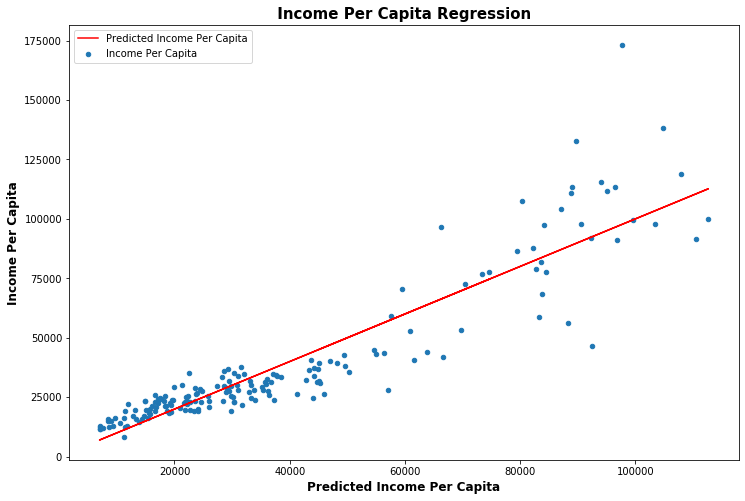

In [93]:
fig, ax = plt.subplots(figsize=(12,8))
edu.plot(ax=ax,x='PredictedIncomePerCapita',y='IncomePerCapita',kind='scatter',)
ax.plot(edu['PredictedIncomePerCapita'],edu['PredictedIncomePerCapita'],'r-')
plt.title(' Income Per Capita Regression ', weight='bold', fontsize=15)

plt.xlabel('Predicted Income Per Capita', fontsize=12, weight='bold')
plt.ylabel('Income Per Capita',fontsize=12, weight='bold')
plt.legend(['Predicted Income Per Capita','Income Per Capita'])

plt.show()

## Problem 3:Refer in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  Y∼CXq  between total, violent and property crime vs population (by running log-scale regression where Crime>0). Visualize on the log scale. Does  q=1  fall into the 95% confidence interval? What about 99% CI?

In [38]:
msa = pd.read_csv('data/msalist.csv',encoding = 'unicode_escape')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


In [39]:
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [40]:
demographics = pd.read_csv('data/acs2014/R11460953_SL050.csv', encoding = 'unicode_escape')
demographics.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,...,Geo_PUMA1,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,SE_T003_002,SE_T003_003,SE_T057_001,SE_T083_001
0,1001,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",al,50,0,ACSSF,13,NaN,...,NaN,55136,55136,92.75346,594.436089,604.3882,594.4361,9.952067,52475,24644
1,1003,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",al,50,0,ACSSF,14,NaN,...,NaN,191205,191205,120.27100,1589.784070,2027.3110,1589.7840,437.527200,50183,26851
2,1005,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",al,50,0,ACSSF,15,NaN,...,NaN,27119,27119,30.64722,884.876304,904.5153,884.8763,19.638980,35634,17350
3,1007,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",al,50,0,ACSSF,16,NaN,...,NaN,22653,22653,36.38555,622.582332,626.1689,622.5823,3.586525,37984,18110
4,1009,05000US01009,"Blount County, Alabama","Blount County, Alabama",al,50,0,ACSSF,17,NaN,...,NaN,57645,57645,89.40315,644.775905,650.6282,644.7759,5.852321,44409,20501


In [41]:
demographics.shape

(3220, 64)

In [42]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [43]:
demographics['Income']=demographics.Population*demographics['Per capita income']
demographics.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455
2,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",5,27119,30.64722,884.876304,35634,17350,470514650
3,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830
4,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145


In [44]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [45]:
sum(demographics.Population)

317746049

In [46]:
demographics.dtypes

Geo_GEOID                   object
Geo_NAME                    object
Geo_QName                   object
Geo_COUNTY                   int64
Population                   int64
Population Density         float64
Area                       float64
Median household income      int64
Per capita income            int64
Income                       int64
ID                           int64
dtype: object

In [47]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:])) # from 7th character 
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner') #merges data from 2 tables based on ID as common column
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [48]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


### Repeat the same steps for Crime data

In [49]:
crime2014 = pd.read_csv('data/crime2014/R11460954_SL050.csv')
crime2014.head()

,Geo_FIPS,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,...,SE_T006_001,SE_T006_002,SE_T006_003,SE_T006_004,SE_T007_001,SE_T007_002,SE_T007_003,SE_T007_004,SE_T008_001,SE_T009_001
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,870.114631,...,414,170.0,199.0,45.0,747.359870,306.886903,359.238198,81.234768,NaN,NaN
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,379.789217,...,662,230.0,405.0,27.0,330.816397,114.936210,202.387675,13.492512,NaN,NaN
2,01005,Barbour County,"Barbour County, Alabama",1,005,26887.0,145,17,128,539.294083,...,128,68.0,55.0,5.0,476.066501,252.910328,204.559824,18.596348,NaN,NaN
3,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,382.120323,...,82,42.0,34.0,6.0,364.347285,186.616902,151.070826,26.659557,NaN,NaN
4,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1755.054661,...,923,311.0,524.0,88.0,1599.126804,538.817374,907.846636,152.462794,NaN,NaN


In [50]:
crime2014.columns

Index(['Geo_FIPS', 'Geo_NAME', 'Geo_QNAME', 'Geo_STATE', 'Geo_COUNTY',
       'SE_T001_001', 'SE_T002_001', 'SE_T002_002', 'SE_T002_003',
       'SE_T003_001', 'SE_T003_002', 'SE_T003_003', 'SE_T004_001',
       'SE_T004_002', 'SE_T004_003', 'SE_T004_004', 'SE_T004_005',
       'SE_T004_006', 'SE_T005_001', 'SE_T005_002', 'SE_T005_003',
       'SE_T005_004', 'SE_T005_005', 'SE_T005_006', 'SE_T006_001',
       'SE_T006_002', 'SE_T006_003', 'SE_T006_004', 'SE_T007_001',
       'SE_T007_002', 'SE_T007_003', 'SE_T007_004', 'SE_T008_001',
       'SE_T009_001'],
      dtype='object')

In [51]:
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]

In [52]:
crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [53]:
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population',u'Crimes', u'Violent Crimes', u'Property Crimes']]
msaCrime.where(msaCrime[u'Crimes']>0, inplace=True)
msaCrime.sort_values(by=u'Crimes', ascending=True).head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
11020,125955.0,1.0,1.0,0.0
21500,278443.0,2.0,0.0,2.0
36140,95344.0,3.0,2.0,1.0
10900,407571.0,3.0,0.0,3.0
49620,440755.0,5.0,5.0,0.0


In [54]:
msaCrime.isna()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,False,False,False,False
10420,False,False,False,False
10500,False,False,False,False
10540,False,False,False,False
10580,False,False,False,False
10740,False,False,False,False
10780,False,False,False,False
10900,False,False,False,False
11020,False,False,False,False


In [55]:
msaCrime.dropna()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,168592.0,492.0,62.0,430.0
10420,703825.0,2397.0,106.0,2291.0
10500,151670.0,1364.0,107.0,1257.0
10540,119356.0,1092.0,23.0,1069.0
10580,880167.0,1590.0,91.0,1499.0
10740,904587.0,4616.0,1062.0,3554.0
10780,154872.0,2301.0,278.0,2023.0
10900,407571.0,3.0,0.0,3.0
11020,125955.0,1.0,1.0,0.0


In [56]:
for c in msaCrime.columns:
    msaCrime[c]=np.log(msaCrime[c])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [57]:
msaCrime.sort_values(by=u'Crimes',ascending=False, inplace=True)
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
26420,15.685801,11.198352,9.287764,11.038191
33100,15.595504,11.025784,9.090768,10.869806
36740,14.657689,10.683661,8.882114,10.503285
45300,14.885580,10.571035,8.373323,10.453313
24860,13.667548,10.098890,8.106515,9.952278


In [58]:
msaCrime.isna()
msaCrime.dropna(how='all',inplace=True)

In [59]:
scalingdata=msaCrime.copy()
scalingdata.rename(columns={'Crimes':'Crime','Violent Crimes':'Violent', 'Property Crimes':'Property'}, inplace=True)
scalingdata.head()

,Population,Crime,Violent,Property
msa,,,,
26420,15.685801,11.198352,9.287764,11.038191
33100,15.595504,11.025784,9.090768,10.869806
36740,14.657689,10.683661,8.882114,10.503285
45300,14.885580,10.571035,8.373323,10.453313
24860,13.667548,10.098890,8.106515,9.952278


In [60]:
scalingdata.where((scalingdata.Violent>0) & (scalingdata.Property>0), inplace=True)

In [61]:
scalingdata.dropna(how='all', inplace=True)
scalingdata.shape

(331, 4)

In [62]:
sreg=smf.ols(formula='Crime~Population', data=scalingdata).fit()
print(sreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     317.9
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.11e-50
Time:                        02:22:02   Log-Likelihood:                -435.32
No. Observations:                 331   AIC:                             874.6
Df Residuals:                     329   BIC:                             882.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9512      0.574     -5.140      0.0

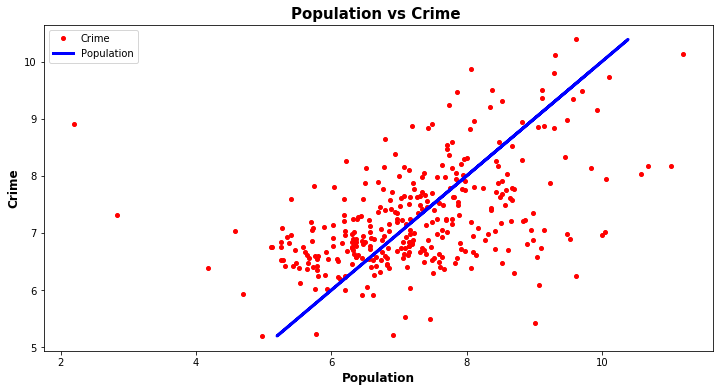

In [86]:
plt.figure(figsize=(12,6))
plt.plot(scalingdata.Crime, sreg.predict(), 'ro', markersize = 4)
plt.title('Population vs Crime ', fontsize = 15, weight='bold')
ax.set(ylabel='Crime', xlabel='Population')
plt.plot(sreg.predict(), sreg.predict(), 'b-', lw=3)
plt.xlabel('Population', fontsize=12, weight='bold')
plt.ylabel('Crime',fontsize=12, weight='bold')
plt.legend(['Crime','Population'])

plt.show()

In [64]:
sreg.conf_int(alpha=0.05)

,0,1
Intercept,-4.080686,-1.82172
Population,0.723514,0.90297


### Task 2: Find top 5 and last 5 cities by crime log-residual (difference between log-crime and above regression prediction)

In [65]:
scalingdata['msaName']=scalingdata.index.map(msaNames)
scalingdata.head()

,Population,Crime,Violent,Property,msaName
msa,,,,,
26420,15.685801,11.198352,9.287764,11.038191,"Houston-The Woodlands-Sugar Land, TX (Metropol..."
33100,15.595504,11.025784,9.090768,10.869806,"Miami-Fort Lauderdale-West Palm Beach, FL (Met..."
36740,14.657689,10.683661,8.882114,10.503285,"Orlando-Kissimmee-Sanford, FL (Metropolitan St..."
45300,14.885580,10.571035,8.373323,10.453313,"Tampa-St. Petersburg-Clearwater, FL (Metropoli..."
24860,13.667548,10.098890,8.106515,9.952278,"Greenville-Anderson-Mauldin, SC (Metropolitan ..."


In [66]:
scalingdata['CrimeRes']=sreg.predict()-scalingdata['Crime']

In [67]:
scalingdata.sort_values(by='CrimeRes', ascending=False, inplace=True)
print('The Top 5 cities by crime log-residual are: {}'.format(scalingdata.msaName.head(5)))

The Top 5 cities by crime log-residual are: msa
38300       Pittsburgh, PA (Metropolitan Statistical Area)
14460    Boston-Cambridge-Newton, MA-NH (Metropolitan S...
37980    Philadelphia-Camden-Wilmington, PA-NJ-DE-MD (M...
38540        Pocatello, ID (Metropolitan Statistical Area)
39340       Provo-Orem, UT (Metropolitan Statistical Area)
Name: msaName, dtype: object


In [68]:
scalingdata.sort_values(by='CrimeRes', ascending=True, inplace=True)
print('The Last 5 cities by crime log-residual are: {}'.format(scalingdata.msaName.head(5)))

The Last 5 cities by crime log-residual are: msa
31420    Macon-Bibb County, GA (Metropolitan Statistica...
24860    Greenville-Anderson-Mauldin, SC (Metropolitan ...
37860    Pensacola-Ferry Pass-Brent, FL (Metropolitan S...
35380    New Orleans-Metairie, LA (Metropolitan Statist...
36740    Orlando-Kissimmee-Sanford, FL (Metropolitan St...
Name: msaName, dtype: object


### Task 3: Is there any correlation between residual by income and residual by crime?

In [69]:
#### First we have to fit the regression Income vs Population

In [70]:
scalingdata2=msaDemo.copy()
scalingdata2.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


In [71]:
scalingdata2=np.log(scalingdata2)

In [72]:
scalingdata2.sort_values(by='Income',ascending=False, inplace=True)
scalingdata2.head()

,Population,Area,Income
msa,,,
35620,16.804472,9.023314,27.297920
31080,16.385106,8.486415,26.677462
16980,16.068532,8.881392,26.425884
19100,15.718069,9.135378,26.019203
37980,15.609823,8.434268,26.009518


In [73]:
sreg2=smf.ols(formula='Income~Population', data=scalingdata2).fit()
print(sreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 2.157e+04
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        02:22:02   Log-Likelihood:                 175.13
No. Observations:                 379   AIC:                            -346.3
Df Residuals:                     377   BIC:                            -338.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3549      0.092    101.819      0.0

In [74]:
scalingdata2['IncomeRes']=sreg2.predict()-scalingdata2['Income']
scalingdata2.head()

,Population,Area,Income,IncomeRes
msa,,,,
35620,16.804472,9.023314,27.297920,-0.074131
31080,16.385106,8.486415,26.677462,0.100397
16980,16.068532,8.881392,26.425884,0.015349
19100,15.718069,9.135378,26.019203,0.049368
37980,15.609823,8.434268,26.009518,-0.056049


In [75]:
tempdata=scalingdata2.Income
scalingdata['Income']=scalingdata.index.map(tempdata)
tempdata2=scalingdata2.IncomeRes
scalingdata['IncomeRes']=scalingdata.index.map(tempdata2)

finaldata=scalingdata[['Population','Crime','Violent','Property','Income','CrimeRes','IncomeRes']]
finaldata.head()

,Population,Crime,Violent,Property,Income,CrimeRes,IncomeRes
msa,,,,,,,
31420,12.347789,9.294773,6.767343,9.211540,22.347709,-2.204234,0.144029
24860,13.667548,10.098890,8.106515,9.952278,23.754317,-1.935068,0.109348
37860,13.069133,9.490545,7.590852,9.328479,23.178637,-1.813378,0.046543
35380,13.673404,9.919656,7.750184,9.798349,24.240052,-1.751071,0.022494
36740,14.657689,10.683661,8.882114,10.503285,24.737741,-1.714614,0.159052


In [76]:
print(('The Correlation coefficient between Income Residual and Crime Residual is: {}').format(finaldata.CrimeRes.corr(finaldata.IncomeRes)))

The Correlation coefficient between Income Residual and Crime Residual is: -0.18868887357396935


### The two variables are negatively correlated, as one increased the other decreases